In [1]:
# ライブラリの読み込み
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, skew #for some statistics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from pycaret.regression import setup

%matplotlib inline

In [2]:
# 学習データとテストデータの読み込み
# train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
# test = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# 学習データの最初の5行を表示
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Id列削除前の型を確認
print("The train data size before dropping Id feature is : {} ".format(train.shape))
print("The test data size before dropping Id feature is : {} ".format(test.shape))

# Idだけ別に保持する
train_ID = train['Id']
test_ID = test['Id']

# 予測に不要なのでId列を削除する
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

# Id列削除後の型を確認
print("\nThe train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))

The train data size before dropping Id feature is : (1460, 81) 
The test data size before dropping Id feature is : (1459, 80) 

The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


In [5]:

from pycaret.regression import setup
clf = setup(data=train, target="SalePrice",   numeric_imputation="mean", categorical_imputation="mode")


,Description,Value
0,session_id,4880
1,Target,SalePrice
2,Original Data,"(1460, 80)"
3,Missing Values,1
4,Numeric Features,18
5,Categorical Features,61
6,Ordinal Features,0
7,High Cardinality Features,0
8,High Cardinality Method,None
9,Transformed Train Set,"(1021, 389)"


In [53]:
from pycaret.regression import compare_models
best_model = compare_models()  # 全てのモデルを訓練し、評価する
print(best_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,17320.8608,784048964.3289,27476.0178,0.8630,0.1440,0.1031,0.3100
gbr,Gradient Boosting Regressor,17295.4271,811402385.0597,27575.4197,0.8571,0.1398,0.1021,0.7670
rf,Random Forest Regressor,18562.5799,934579724.8214,29700.1052,0.8378,0.1546,0.1118,2.1930
et,Extra Trees Regressor,20445.0002,1072953257.8437,32399.5650,0.8093,0.1648,0.1192,1.6740
ridge,Ridge Regression,18778.2080,1181116944.4432,32261.2774,0.7956,0.1668,0.1131,0.1080
ada,AdaBoost Regressor,24269.4023,1271350613.9576,35027.6466,0.7754,0.1936,0.1549,0.6010
omp,Orthogonal Matching Pursuit,18063.3999,1276488443.2140,32156.2717,0.7749,0.1589,0.1112,0.0670
lasso,Lasso Regression,19542.2243,1406148896.1603,34328.7037,0.7499,0.2015,0.1211,0.2010
en,Elastic Net,20826.5662,1451441699.3310,35456.5130,0.7493,0.1665,0.1224,0.1590
lr,Linear Regression,22176.1102,1616759412.3145,37906.9287,0.7119,0.2486,0.1422,1.5340


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=4880, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [54]:
from pycaret.regression import models
print(models())  # 機械学習モデルの一覧

                                       Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada          

In [55]:
from pycaret.regression import create_model
model55 = create_model("lightgbm")  # モデルを作成
print(model55)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,17356.5028,802386237.0433,28326.4229,0.8366,0.1243,0.0926
1,22356.3091,1484347748.7342,38527.2339,0.8414,0.1566,0.1162
2,16577.3850,510404571.2190,22592.1352,0.8729,0.1657,0.1203
3,16569.0479,857876913.8784,29289.5359,0.8499,0.1354,0.0903
4,17896.2351,719270235.1759,26819.2139,0.8805,0.1397,0.1038
5,16623.9155,747841118.1887,27346.6839,0.8698,0.1409,0.0956
6,17578.5806,807563727.5631,28417.6658,0.8350,0.1707,0.1160
7,14680.7436,382886853.3503,19567.4948,0.9255,0.1300,0.0922
8,15906.8474,430287366.0691,20743.3692,0.9103,0.1267,0.0961
9,17663.0412,1097624872.0669,33130.4222,0.8077,0.1496,0.1082


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=4880, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [56]:
from pycaret.regression import tune_model
tuned_model55 = tune_model(model55)  # ハイパーパラメータの調整
print(tuned_model55)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,18687.0331,895835815.6524,29930.5165,0.8176,0.1329,0.0991
1,24377.4843,1846903872.2616,42975.6195,0.8027,0.1832,0.1311
2,16757.8785,504347164.3353,22457.6750,0.8744,0.1625,0.1184
3,20613.5628,1151722304.3332,33937.0344,0.7985,0.1592,0.1131
4,20229.8827,864768871.5431,29406.9528,0.8563,0.1540,0.1212
5,18529.7911,917328278.1209,30287.4277,0.8403,0.1486,0.1074
6,19206.2762,1010478612.2251,31788.0262,0.7936,0.1838,0.1246
7,16416.7545,538628183.5866,23208.3645,0.8952,0.1407,0.1006
8,15697.8517,454493336.6384,21318.8493,0.9052,0.1237,0.0966
9,15635.2132,963207966.0779,31035.5919,0.8312,0.1511,0.0995


LGBMRegressor(bagging_fraction=0.9, bagging_freq=5, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.15, max_depth=-1,
              min_child_samples=61, min_child_weight=0.001, min_split_gain=0.1,
              n_estimators=90, n_jobs=-1, num_leaves=6, objective=None,
              random_state=4880, reg_alpha=0.01, reg_lambda=0.3, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


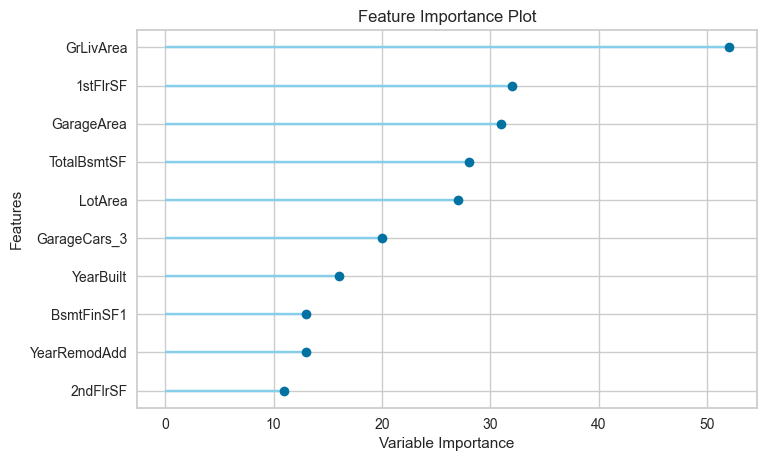

In [57]:
from pycaret.regression import plot_model
plot_model(tuned_model55, plot="feature")  # 各特徴の重要度をプロット


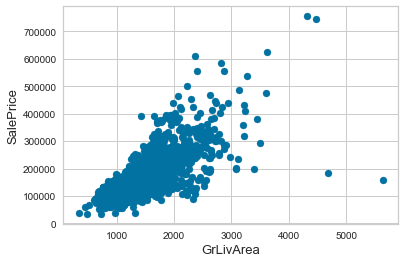

In [6]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

## 外れ値を除去する

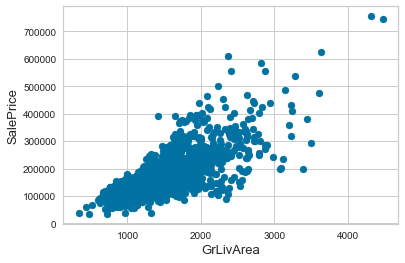

In [7]:
# 外れ値を除去する
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

# グラフで表示して再度チェックする
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

mu = 180932.92 and sigma = 79467.79
※muは、中央値。 sigmaは、分散値


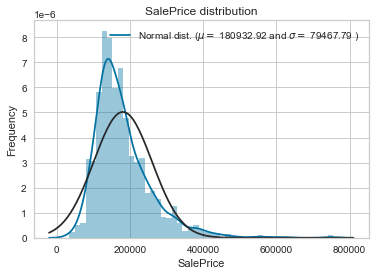

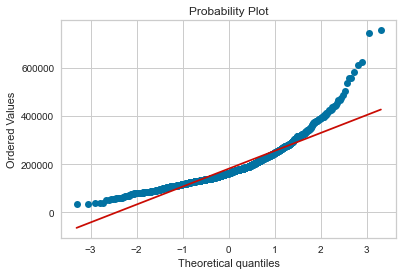

In [8]:
# 正規分布付きのヒストグラムを描画する
sns.distplot(train['SalePrice'] , fit=norm);

# MLE(Maximum Likelihood Estimate)を用いて分布を推定する
(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print('※muは、中央値。 sigmaは、分散値')

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQプロットを描画する
# 正規QQプロットとは、観測値が正規分布に従う場合の期待値をY軸にとり、観測値そのものをX軸にとった確率プロット。
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

mu = 12.02 and sigma = 0.40
※muは、中央値。 sigmaは、分散値


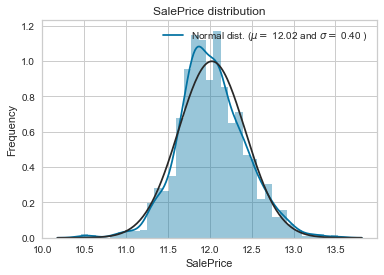

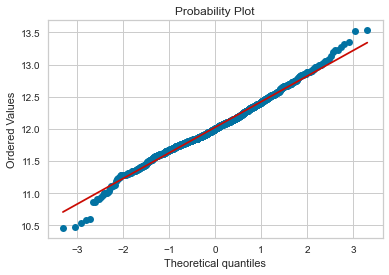

In [9]:
# SalePriceをlog(1+x)　で対数に変換する
train["SalePrice"] = np.log1p(train["SalePrice"])

# 正規分布付きのヒストグラムを描画する
sns.distplot(train['SalePrice'] , fit=norm);

# MLE(Maximum Likelihood Estimate)を用いて分布を推定する
(mu, sigma) = norm.fit(train['SalePrice'])
print('mu = {:.2f} and sigma = {:.2f}'.format(mu, sigma))
print('※muは、中央値。 sigmaは、分散値')

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

# QQプロットを描画する
# 正規QQプロットとは、観測値が正規分布に従う場合の期待値をY軸にとり、観測値そのものをX軸にとった確率プロット。
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [10]:
# 学習データとテストデータを連結して、all_dataを作成する
# ntrain = train.shape[0]
# ntest = test.shape[0]
# y_train = train.SalePrice.values
# #y_train.to_csv('y_train.csv')
# print(y_train)
#print(dtype(train))
# train.to_csv('a.csv')
# all_data = pd.concat((train, test)).reset_index(drop=True)
# all_data.to_csv('alldata.csv')
# all_data.drop(['SalePrice'], axis=1, inplace=True)
#print("all_data size is : {}".format(all_data.shape))

In [11]:
# all_data_na = (all_data.isnull().sum() / len(all_data)) * 100
# all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
# missing_data = pd.DataFrame({'欠損比率' :all_data_na})
# missing_data.head(100)

train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'欠損比率' :train_na})
missing_data.head(100)




,欠損比率
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
FireplaceQu,47.325103
LotFrontage,17.764060
GarageType,5.555556
GarageYrBlt,5.555556
GarageFinish,5.555556
GarageQual,5.555556


In [12]:
# f, ax = plt.subplots(figsize=(10, 8))
# plt.xticks(rotation='90')
# sns.barplot(x=train_na.index, y=train_na)
# plt.xlabel('Features', fontsize=15)
# plt.ylabel('Percent of missing values', fontsize=15)
# plt.title('Percent missing data by feature ', fontsize=15)

<AxesSubplot:>

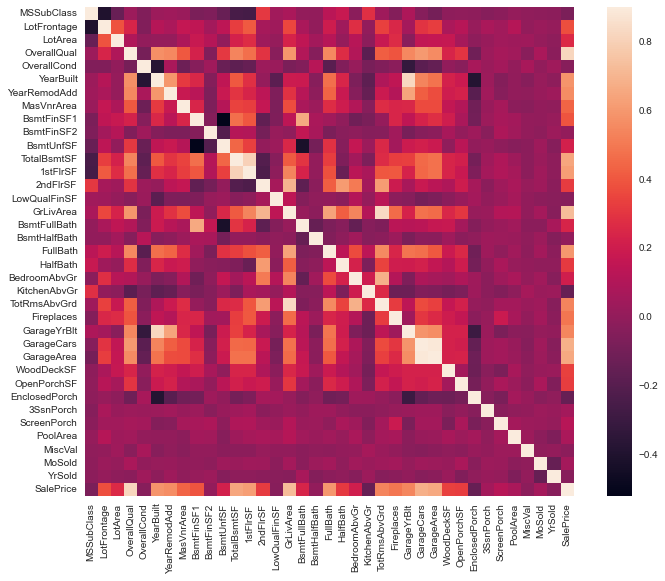

In [13]:
# SalePriceとの相関を確認する
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [14]:
train = train.drop(['Utilities'], axis=1)

In [15]:
train["PoolQC"] = train["PoolQC"].fillna("None")
train["Alley"] = train["Alley"].fillna("None")
train["Fence"] = train["Fence"].fillna("None")
train["MiscFeature"] = train["MiscFeature"].fillna("None")
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")
train["LotFrontage"] = train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    train[col] = train[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    train[col] = train[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    train[col] = train[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    train[col] = train[col].fillna('None')
train["MasVnrType"] = train["MasVnrType"].fillna("None")
train["MasVnrArea"] = train["MasVnrArea"].fillna(0)
train['MSZoning'] = train['MSZoning'].fillna(train['MSZoning'].mode()[0])
train["Functional"] = train["Functional"].fillna("Typ")
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])
train['KitchenQual'] = train['KitchenQual'].fillna(train['KitchenQual'].mode()[0])
train['Exterior1st'] = train['Exterior1st'].fillna(train['Exterior1st'].mode()[0])
train['Exterior2nd'] = train['Exterior2nd'].fillna(train['Exterior2nd'].mode()[0])
train['SaleType'] = train['SaleType'].fillna(train['SaleType'].mode()[0])
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'欠損比率' :train_na})
missing_data.head()


,欠損比率


In [16]:
# 数字型のカテゴリ変数を、文字列型に変更する
train['MSSubClass'] = train['MSSubClass'].apply(str)
train['OverallCond'] = train['OverallCond'].astype(str)
train['YrSold'] = train['YrSold'].astype(str)
train['MoSold'] = train['MoSold'].astype(str)

#train.to_csv('train.csv')


In [17]:
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(train[c].values)) 
    train[c] = lbl.transform(list(train[c].values))

print('Shape all_data: {}'.format(train.shape))
train.to_csv('2.csv')

Shape all_data: (1458, 79)


In [18]:
#販売価格の予測には、面積関連の特徴が非常に重要なため、地下の総面積、各家の1階と2階の面積である特徴をもう1つ追加する
train['TotalSF'] = train['TotalBsmtSF'] + train['1stFlrSF'] + train['2ndFlrSF']

In [19]:
numeric_feats = train.dtypes[train.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("数値型変数の歪度: ")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)

数値型変数の歪度: 


,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
LandSlope,4.805032
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895


In [20]:
train.to_csv('3.csv')
"""
#歪度の高い変数を、BoxCox変換する。Box-cox変換：データの構造を無理やり正規分布に変換してくれるらしい。
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))
from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    train[feat] = boxcox1p(train[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])
"""

'\n#歪度の高い変数を、BoxCox変換する。Box-cox変換：データの構造を無理やり正規分布に変換してくれるらしい。\nskewness = skewness[abs(skewness) > 0.75]\nprint("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))\nfrom scipy.special import boxcox1p\nskewed_features = skewness.index\nlam = 0.15\nfor feat in skewed_features:\n    #all_data[feat] += 1\n    train[feat] = boxcox1p(train[feat], lam)\n    \n#all_data[skewed_features] = np.log1p(all_data[skewed_features])\n'

In [21]:
train = train.reset_index(drop=True)  #インデックスをリセット（行削除がある場合、降り直ししておかないと、KFoldでエラーになる）
#train.to_csv('train.csv')

In [22]:
train.to_csv('4.csv')
train = pd.get_dummies(train)     #残りの文字列を数値化する
print(train.shape)


(1458, 221)


In [23]:
# train = all_data[:ntrain]
# test = all_data[ntrain:]

#train.to_csv('train.csv')

In [24]:
#アルゴリズムに投入するため、特徴量と目的変数を分離
y_data_train = train['SalePrice']
x_data_train = train.drop('SalePrice', axis=1)

In [25]:
from sklearn.model_selection import KFold
import lightgbm as lgb

y_data_preds = []
models = []
oof_data_train = np.zeros((len(x_data_train),))
cv = KFold(n_splits=5, shuffle=True, random_state=0)  #５は分割数の指定

params = { 
            'objective'     :'regression' ,
            'max_bin'       : 300,
            'learning_rate' : 0.05,
            'num_leaves'    : 40
         
         }  #最低限は目的を表すobjectiveを設定する binary:二値分類
            #公式の指針に従う：  https://lightgbm.readthedocs.io/en/latest/Parameters.html 


categorical_features = ['1stFlrSF','2ndFlrSF','Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual','ExterCond','ExterQual','Fence','FireplaceQu','Functional','GarageCond','GarageFinish','GarageQual','HeatingQC','LotShape','LowQualFinSF','PavedDrive','PoolArea','PoolQC','ScreenPorch','Street']  #LightGBMはカテゴリ変数をそのまま処理できる（one-hot不要）    


    
for fold_id, (train_index, valid_index) in enumerate(cv.split(x_data_train)):  #指定数で分割して取り出す
    x_tr  = x_data_train.loc[train_index, :]
    x_val = x_data_train.loc[valid_index, :]
    y_tr  = y_data_train[train_index]
    y_val = y_data_train[valid_index]
    
    lgb_data_train = lgb.Dataset(x_tr, y_tr,   categorical_feature=categorical_features)
    lgb_data_eval  = lgb.Dataset(x_val, y_val, reference=lgb_data_train, categorical_feature=categorical_features)

    model = lgb.train(params, lgb_data_train, valid_sets=lgb_data_eval,
                  verbose_eval=10,
                  num_boost_round=1000,
                  early_stopping_rounds=10
                 )
#     # verbose_eval=10           学習１０回ごとに画面に表示する
#     # num_boost_round=1000      学習の繰り返す回数 
#     # early_stopping_rounds=10  過学習を防ぐため  10回連続で誤差が減らない場合にSTOP
    
#     #各分割での検証用データに対する予測値を格納
    
    oof_data_train[valid_index] = model.predict(x_val, num_iteration=model.best_iteration)
    
#     #テストデータに対しての予測
#     #y_data_pred = model.predict(x_data_test, num_iteration=model.best_iteration)
    
#     #テストデータの予測結果を格納 （5回ループ分の結果を追加している）
#     #y_data_preds.append(y_data_pred)
    
#     #モデル自体を格納 （5回ループ分を追加している）
    models.append(model)



[LightGBM] [Warning] Met categorical feature which contains sparse values. Consider renumbering to consecutive integers started from zero
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001456 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3355
[LightGBM] [Info] Number of data points in the train set: 1166, number of used features: 142
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Start training from score 12.019375
Training until validation scores don't improve for 10 rounds
[10]	valid_0's l2: 0.0757283
[20]	valid_0's l2: 0.0397006
[30]	valid_0's l2: 0.025773
[40]	valid_0's l2: 0.019891
[50]	valid_0's l2: 0.0174819
[60]	valid_0's l2: 0.0161681
[70]	valid_0's l2: 0.0155068
[80]	valid_0's l2: 0.0151563
[

In [26]:
#各ベストスコアを格納
scores = [
    m.best_score['valid_0']['l2'] for m in models 
]
score = sum(scores) / len(scores)  # ベストスコアの平均を計算する
print(scores)
print(score)


[0.014946531340050695, 0.01973041218655393, 0.02036582976417892, 0.014979302384906195, 0.011569139776595516]
0.016318243090457048


      SalePrice           pred            sa  gosa
0      208500.0  205954.956389  -2545.043611  -1.0
1      181500.0  174807.296474  -6692.703526  -4.0
2      223500.0  222120.939332  -1379.060668  -1.0
3      140000.0  168756.611634  28756.611634  21.0
4      250000.0  283424.992080  33424.992080  13.0
...         ...            ...           ...   ...
1453   175000.0  173389.165609  -1610.834391  -1.0
1454   210000.0  185530.702220 -24469.297780 -12.0
1455   266500.0  258335.938782  -8164.061218  -3.0
1456   142125.0  143721.302134   1596.302134   1.0
1457   147500.0  153182.857446   5682.857446   4.0

[1458 rows x 4 columns]


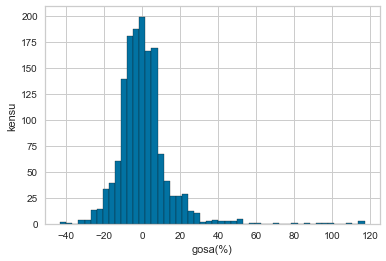

In [27]:

sub = pd.DataFrame()
# sub['pred'] = np.expm1(oof_data_train)
# sub['SalePrice'] = np.expm1( y_data_train )
sub['SalePrice'] =  np.expm1( y_data_train )
sub['pred'] = np.expm1(oof_data_train )
sub['sa'] = sub['pred'] - sub['SalePrice']
sub['gosa'] = sub['sa']/sub['SalePrice']*100
sub['gosa'] = sub['gosa'].round()

print(sub)

#ヒストグラム作成
fig, ax = plt.subplots()
plt.title('')
plt.xlabel('gosa(%)')
plt.ylabel('kensu')
ax.hist(sub['gosa'], bins=50, ec="k")

#結果をCSV出力
sub.to_csv('submission.csv',index=False)





In [28]:
# from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
# from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
# from sklearn.kernel_ridge import KernelRidge
# from sklearn.pipeline import make_pipeline
# from sklearn.preprocessing import RobustScaler
# from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
# from sklearn.model_selection import KFold, cross_val_score, train_test_split
# from sklearn.metrics import mean_squared_error
# import xgboost as xgb
# import lightgbm as lgb

In [29]:
# n_folds = 5

# def rmsle_cv(model):
#     kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
#     rmse= np.sqrt(-cross_val_score(model, train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
#     return(rmse)

In [30]:
# # LASSO Regression（LASSO回帰）：
# # このモデルは外れ値に非常に敏感である可能性があるため、より堅牢にする必要がある。
# # そのために、パイプラインでsklearnのRobustscaler（）メソッドを使用する。
# lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [31]:
# Elastic Net Regression（Elastic Net 回帰） :
# 外れ値に対して堅牢にする
# ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [32]:
# Kernel Ridge Regression（カーネルリッジ回帰） :
# KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [33]:
# # Gradient Boosting Regression（勾配ブースティング回帰） :
# # 外れ値に対して、堅牢にするハブ損失
# GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
#                                    max_depth=4, max_features='sqrt',
#                                    min_samples_leaf=15, min_samples_split=10, 
#                                    loss='huber', random_state =5)

In [34]:
# # XGBoost :
# model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
#                              learning_rate=0.05, max_depth=3, 
#                              min_child_weight=1.7817, n_estimators=2200,
#                              reg_alpha=0.4640, reg_lambda=0.8571,
#                              subsample=0.5213, silent=1,
#                              random_state =7, nthread = -1)

In [35]:
# # LightGBM :
# model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
#                               learning_rate=0.05, n_estimators=720,
#                               max_bin = 55, bagging_fraction = 0.8,
#                               bagging_freq = 5, feature_fraction = 0.2319,
# #                               feature_fraction_seed=9, bagging_seed=9,
#                               min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [36]:
# score = rmsle_cv(lasso)
# print("Lasso score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [37]:
# score = rmsle_cv(ENet)
# print("ElasticNet score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [38]:
# score = rmsle_cv(KRR)
# print("Kernel Ridge score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [39]:
# score = rmsle_cv(GBoost)
# print("Gradient Boosting score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [40]:
# score = rmsle_cv(model_xgb)
# print("Xgboost score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [41]:
# score = rmsle_cv(model_lgb)
# print("LGBM score: {:.4f} ({:.4f})" .format(score.mean(), score.std()))

In [42]:
# class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
#     def __init__(self, models):
#         self.models = models
        
#     def fit(self, X, y):
#         self.models_ = [clone(x) for x in self.models]
        
#         # Train cloned base models
#         for model in self.models_:
#             model.fit(X, y)

#         return self
    
#     def predict(self, X):
#         predictions = np.column_stack([
#             model.predict(X) for model in self.models_
#         ])
#         return np.mean(predictions, axis=1) 

In [43]:
# averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

# score = rmsle_cv(averaged_models)
# print(" Averaged base models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [44]:
# class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
#     def __init__(self, base_models, meta_model, n_folds=5):
#         self.base_models = base_models
#         self.meta_model = meta_model
#         self.n_folds = n_folds
   
#     def fit(self, X, y):
#         self.base_models_ = [list() for x in self.base_models]
#         self.meta_model_ = clone(self.meta_model)
#         kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
#         out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
#         for i, model in enumerate(self.base_models):
#             for train_index, holdout_index in kfold.split(X, y):
#                 instance = clone(model)
#                 self.base_models_[i].append(instance)
#                 instance.fit(X[train_index], y[train_index])
#                 y_pred = instance.predict(X[holdout_index])
#                 out_of_fold_predictions[holdout_index, i] = y_pred
                
#         self.meta_model_.fit(out_of_fold_predictions, y)
#         return self
   
#     def predict(self, X):
#         meta_features = np.column_stack([
#             np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
#             for base_models in self.base_models_ ])
#         return self.meta_model_.predict(meta_features)

In [45]:
# stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
#                                                  meta_model = lasso)

# score = rmsle_cv(stacked_averaged_models)
# print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

In [46]:
# def rmsle(y, y_pred):
#     return np.sqrt(mean_squared_error(y, y_pred))

In [47]:
# stacked_averaged_models.fit(train.values, y_train)
# stacked_train_pred = stacked_averaged_models.predict(train.values)
# stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
# print(rmsle(y_train, stacked_train_pred))

In [48]:
# model_xgb.fit(train, y_train)
# xgb_train_pred = model_xgb.predict(train)
# xgb_pred = np.expm1(model_xgb.predict(test))
# print(rmsle(y_train, xgb_train_pred))

In [49]:
# model_lgb.fit(train, y_train)
# lgb_train_pred = model_lgb.predict(train)
# lgb_pred = np.expm1(model_lgb.predict(test.values))
# print(rmsle(y_train, lgb_train_pred))

In [50]:
# '''RMSE on the entire Train data when averaging'''

# print('RMSLE score on train data:')
# print(rmsle(y_train,stacked_train_pred*0.70 +
#                xgb_train_pred*0.15 + lgb_train_pred*0.15 ))

In [51]:
# ensemble = stacked_pred*0.70 + xgb_pred*0.15 + lgb_pred*0.15

In [52]:
# sub = pd.DataFrame()
# sub['Id'] = test_ID
# sub['SalePrice'] = ensemble
# sub.to_csv('submission.csv',index=False)